In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import json as json
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# File to Load (Remember to Change These)
crime_2018 = "Resources/2018-19-data_sa_crime.csv"
crime_2019 = "Resources/2019-20-fullyr-data_sa_crime (1).csv"
crime_2020 = "Resources/2020-21_crime_qtr1_and_qtr2 (1).csv"
sa_postcodes = "Resources/australian_postcodes (1).csv"

# Read data files and store into DataFrames
crime_2018_df = pd.read_csv(crime_2018, parse_dates = ['Reported Date'])
crime_2019_df = pd.read_csv(crime_2019, parse_dates = ['Reported Date'])
crime_2020_df = pd.read_csv(crime_2020, parse_dates = ['Reported Date'])
sa_postcodes_df = pd.read_csv(sa_postcodes)

In [2]:
#merging 4 crime datasets into a merged_data dataframe
merged_data = pd.concat([crime_2018_df,crime_2019_df,crime_2020_df], ignore_index=True)

In [3]:
#cleaning merged_data dataframe and removing rows containing null values
clean_crime_data = merged_data.dropna(how='any')

In [4]:
#renaming SA postcode set to allow merge on shared column
sa_postcodes_df = sa_postcodes_df.rename(columns = {"postcode":"Postcode - Incident",
                                                   'locality': "Suburb - Incident"})

In [5]:
#using loc function to remove any crimes listed against postcode "NOT DISCLOSED"
clean_crime_data = clean_crime_data.loc[clean_crime_data["Postcode - Incident"]!= "NOT DISCLOSED"].copy()

In [6]:
#changing datatype from object to integer to allow merge of two datasets
clean_crime_data["Postcode - Incident"] = clean_crime_data["Postcode - Incident"].astype(str).astype(int)

In [7]:
#Check datatypes of clean_crime_data
#clean_crime_data.dtypes

In [8]:
#Check datatypes of sa_postcodes_df
#sa_postcodes_df.dtypes

In [9]:
#merge both datasets - using left join to drop any postcode data not associated with crimes in SA
crime_postcode_merge_df = pd.merge(clean_crime_data, sa_postcodes_df, on = ["Postcode - Incident", "Suburb - Incident"], how = "left")

In [10]:
#review updated dataframe
crime_postcode_merge_df.head()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count,id,state,long,...,SA2_MAINCODE_2016,SA2_NAME_2016,SA3_CODE_2016,SA3_NAME_2016,SA4_CODE_2016,SA4_NAME_2016,RA_2011,RA_2016,MMM_2015,MMM_2019
0,2018-01-07,ABERFOYLE PARK,5159,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0,15577.0,SA,138.603897,...,403041071.0,Aberfoyle Park,40304.0,Onkaparinga,403.0,Adelaide - South,1.0,1.0,1.0,1.0
1,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,1.0,13683.0,SA,138.608637,...,401011001.0,Adelaide,40101.0,Adelaide City,401.0,Adelaide - Central and Hills,1.0,1.0,1.0,1.0
2,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,5.0,13683.0,SA,138.608637,...,401011001.0,Adelaide,40101.0,Adelaide City,401.0,Adelaide - Central and Hills,1.0,1.0,1.0,1.0
3,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Receive or handle proceeds of crime,1.0,13683.0,SA,138.608637,...,401011001.0,Adelaide,40101.0,Adelaide City,401.0,Adelaide - Central and Hills,1.0,1.0,1.0,1.0
4,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0,13683.0,SA,138.608637,...,401011001.0,Adelaide,40101.0,Adelaide City,401.0,Adelaide - Central and Hills,1.0,1.0,1.0,1.0


In [11]:
crime_postcode_merge_df = crime_postcode_merge_df.drop(columns=['SA2_MAINCODE_2016', 'type', 'sa3', 'SA3_CODE_2016', 
                                      'SA1_MAINCODE_2011', 'id', 'SA1_MAINCODE_2016',
                                      'SA4_CODE_2016','RA_2011','RA_2016','MMM_2015','MMM_2019',
                                      'status','sa4','state'])

In [12]:
crime_data_2019_2020 = crime_postcode_merge_df[["Reported Date", "Suburb - Incident", "Postcode - Incident", "Offence Level 1 Description",
                                               "Offence count", "long", "lat", "dc", "sa3name"]].copy()

crime_data_2019_2020.head()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence count,long,lat,dc,sa3name
0,2018-01-07,ABERFOYLE PARK,5159,OFFENCES AGAINST PROPERTY,1.0,138.603897,-35.061705,SOMERTON PARK DC,Onkaparinga
1,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City
2,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,5.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City
3,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City
4,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City


In [13]:
# Extract and create month and year column
crime_data_2019_2020['Year'] = pd.DatetimeIndex(crime_data_2019_2020['Reported Date']).year
crime_data_2019_2020['Month'] = pd.DatetimeIndex(crime_data_2019_2020['Reported Date']).month
crime_data_2019_2020['Day'] = pd.DatetimeIndex(crime_data_2019_2020['Reported Date']).day


#Drop 2018 data 
crime_data_2019_2020 = crime_data_2019_2020[crime_data_2019_2020.Year != 2018]

crime_data_2019_2020.head()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence count,long,lat,dc,sa3name,Year,Month,Day
46661,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,2.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1,1
46662,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,2.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1,1
46663,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,4.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1,1
46664,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1,1
46665,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1,1


In [14]:
#Create 2019 crime dataframe

crime_data_2019_df = crime_data_2019_2020[crime_data_2019_2020.Year != 2020]

crime_data_2019_df.head()


,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence count,long,lat,dc,sa3name,Year,Month,Day
46661,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,2.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1,1
46662,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,2.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1,1
46663,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,4.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1,1
46664,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1,1
46665,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1,1


In [15]:
#Create 2020 crime dataframe

crime_data_2020_df = crime_data_2019_2020[crime_data_2019_2020.Year != 2019]

crime_data_2020_df.head()


,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence count,long,lat,dc,sa3name,Year,Month,Day
143821,2020-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,6.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2020,1,1
143822,2020-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2020,1,1
143823,2020-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,6.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2020,1,1
143824,2020-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2020,1,1
143825,2020-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2020,1,1


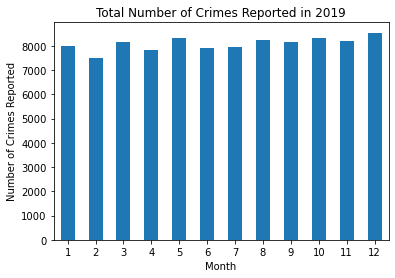

In [16]:
# Create bar graph for total crimes in 2019

crime_2019 = crime_data_2019_df.groupby("Month")['Offence Level 1 Description'].count()

crime_2019.plot(kind="bar", title="Total Number of Crimes Reported in 2019")
plt.ylabel("Number of Crimes Reported")
plt.xticks(rotation=360)
plt.show()


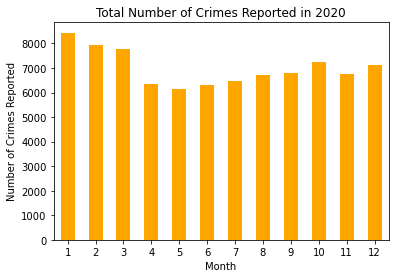

In [17]:
# Create bar graph for total crimes in 2020

crime_2020 = crime_data_2020_df.groupby("Month")['Offence Level 1 Description'].count()

crime_2020.plot(kind="bar", title="Total Number of Crimes Reported in 2020", color="orange")
plt.ylabel("Number of Crimes Reported")
plt.xticks(rotation=360)
plt.show()

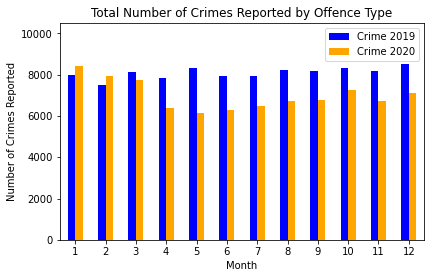

In [18]:
# Create combined bar graph for total crimes in 2019 & 2020

combined_crime = pd.DataFrame ({
    "Crime 2019" : crime_2019,
    "Crime 2020" : crime_2020
})

combined_crime.plot(kind="bar", color=["blue", "orange"])
plt.title("Total Number of Crimes Reported by Offence Type")
plt.xlabel("Month")
plt.ylabel("Number of Crimes Reported")
plt.tight_layout()
plt.ylim(0, 10500)
plt.xticks(rotation=360)
plt.show()

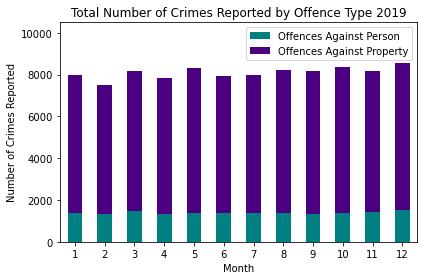

In [19]:
# Create stacked bar to compare offence type 2019
crime_2019_category = crime_data_2019_df.groupby("Month")['Offence Level 1 Description'].value_counts()

crime_2019_property = crime_2019_category.loc[1:12, 'OFFENCES AGAINST PROPERTY']
crime_2019_person = crime_2019_category.loc[1:12, 'OFFENCES AGAINST THE PERSON']

crime_cate_2019 = pd.merge(crime_2019_property, crime_2019_person, on="Month")
crime_cate_2019 = crime_cate_2019.rename(columns={"Offence Level 1 Description_x":"Offences Against Property",
                                                 "Offence Level 1 Description_y": "Offences Against Person"})

crime_cate_2019[["Offences Against Person", "Offences Against Property"]].plot(kind="bar", stacked=True, color=[ "teal", "indigo"])
plt.xticks(rotation=360)
plt.title("Total Number of Crimes Reported by Offence Type 2019")
plt.xlabel("Month")
plt.ylabel("Number of Crimes Reported")
plt.ylim(0, 10500)
plt.tight_layout()
plt.show()

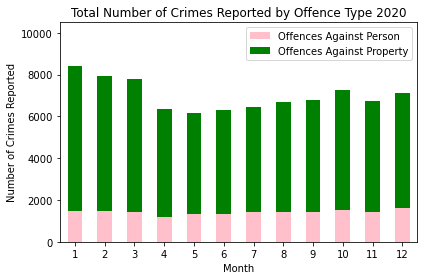

In [20]:
# Create stacked bar to compare offence type 2020
crime_2020_category = crime_data_2020_df.groupby("Month")['Offence Level 1 Description'].value_counts()

crime_2020_property = crime_2020_category.loc[1:12, 'OFFENCES AGAINST PROPERTY']
crime_2020_person = crime_2020_category.loc[1:12, 'OFFENCES AGAINST THE PERSON']

crime_cate_2020 = pd.merge(crime_2020_property, crime_2020_person, on="Month")
crime_cate_2020 = crime_cate_2020.rename(columns={"Offence Level 1 Description_x":"Offences Against Property",
                                                 "Offence Level 1 Description_y": "Offences Against Person"})

crime_cate_2020[["Offences Against Person", "Offences Against Property"]].plot(kind="bar", stacked=True, color=[ "pink", "green"])
plt.xticks(rotation=360)
plt.title("Total Number of Crimes Reported by Offence Type 2020")
plt.xlabel("Month")
plt.ylabel("Number of Crimes Reported")
plt.ylim(0, 10500)
plt.tight_layout()
plt.show()

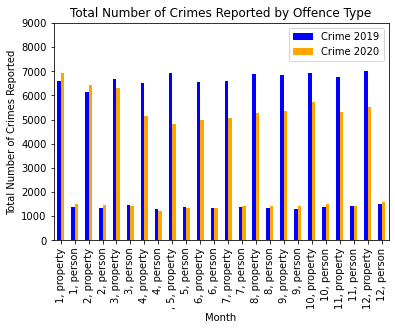

In [21]:
# Create combined bar graph for total crimes in 2019 by offence type

combined_crime_category = pd.DataFrame ({
    "Crime 2019" : crime_2019_category,
    "Crime 2020" : crime_2020_category
})

combined_crime_category.plot(kind="bar", color=["blue", "orange"])
plt.title("Total Number of Crimes Reported by Offence Type")
plt.xlabel("Month")

tickvalues = range(0,24)
plt.xticks(ticks=tickvalues, labels=["1, property", "1, person", "2, property", "2, person", "3, property", "3, person", 
                                "4, property", "4, person", ", 5, property", "5, person", "6, property", "6, person", 
                                "7, property", "7, person", "8, property", "8, person", "9, property", "9, person", 
                                "10, property", "10, person", "11, property", "11, person", "12, property", "12, person"], 
                                rotation="vertical")

plt.ylabel("Total Number of Crimes Reported")
plt.ylim(0, 9000)
plt.show()

In [22]:
# Create dataframe isolating lockdown dates 14 - 25 November

lockdown_2019_df = crime_data_2019_df.loc[(crime_data_2019_df["Reported Date"] >= "2019-11-14") & (crime_data_2019_df["Reported Date"] <= "2019-11-25")]
lockdown_2020_df = crime_data_2020_df.loc[(crime_data_2020_df["Reported Date"] >= "2020-11-14") & (crime_data_2020_df["Reported Date"] <= "2020-11-25")]

lockdown_2019_sum = lockdown_2019_df.groupby("Day")["Offence count"].sum()
lockdown_2020_sum = lockdown_2020_df.groupby("Day")["Offence count"].sum()

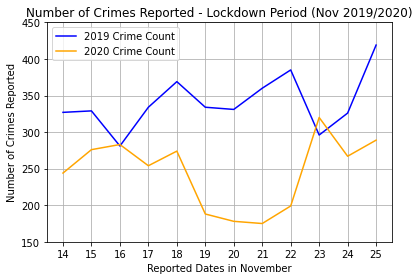

In [23]:
# Create linegraph to compare total crimes over lockdown 2019 / 2020

lockdown_2019_sum.plot(x="Day", y = "Offence Count", color="blue", label ="2019 Crime Count")
lockdown_2020_sum.plot(x="Day", y = "Offence Count", color="orange", label = "2020 Crime Count")

plt.xticks(np.arange(14, 26, 1))

plt.title("Number of Crimes Reported - Lockdown Period (Nov 2019/2020)")
plt.ylabel("Number of Crimes Reported")
plt.xlabel("Reported Dates in November")
plt.grid(True)
plt.ylim(150, 450)
plt.legend()
plt.tight_layout()
plt.show()


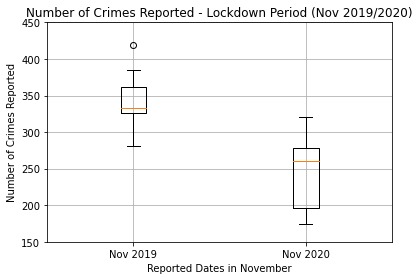

In [24]:
# Create boxplot to compare the total crimes over lockdown period 2019/2020

lockdown_crime_boxplot = [lockdown_2019_sum, lockdown_2020_sum]

fig, ax1 = plt.subplots()
ax1.set_title("Number of Crimes Reported - Lockdown Period (Nov 2019/2020)")
ax1.set_xlabel("Reported Dates in November")
ax1.set_ylabel("Number of Crimes Reported")
ax1.boxplot(lockdown_crime_boxplot, labels=["Nov 2019", "Nov 2020"])
plt.ylim(150, 450)
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
# Lockdown summary 

lockdown_summary = pd.DataFrame ({
"2019": lockdown_2019_sum,
"2020": lockdown_2020_sum })
    
lockdown_summary.describe()


,2019,2020
count,12.000000,12.000000
mean,340.916667,245.583333
std,37.601882,48.732029
min,281.000000,175.000000
25%,326.750000,196.250000
50%,332.500000,260.500000
75%,362.250000,277.750000
max,419.000000,320.000000


In [26]:
# Percentage change and differnce in numbers of total crimes over lockdown 2019 / 2020

pct_change = lockdown_2020_sum / lockdown_2019_sum
nmbr_crime = lockdown_2020_sum - lockdown_2019_sum
mean = lockdown_summary.mean()

lockdown_summary = pd.DataFrame ({
    "2019": lockdown_2019_sum,
    "2020": lockdown_2020_sum,
    "Difference No. Crimes": nmbr_crime,
    "Percentage Change": pct_change 
})

lockdown_summary["Percentage Change"] = lockdown_summary["Percentage Change"].map("{:.2%}".format)

lockdown_summary


,2019,2020,Difference No. Crimes,Percentage Change
Day,,,,
14,327.0,244.0,-83.0,74.62%
15,329.0,276.0,-53.0,83.89%
16,281.0,283.0,2.0,100.71%
17,334.0,254.0,-80.0,76.05%
18,369.0,274.0,-95.0,74.25%
19,334.0,188.0,-146.0,56.29%
20,331.0,178.0,-153.0,53.78%
21,360.0,175.0,-185.0,48.61%
22,385.0,199.0,-186.0,51.69%
